In [1]:
%load_ext autoreload
%autoreload 2

In [13]:
import pandas as pd
import numpy as np
from rank_bm25 import BM25Okapi
from model_helper import l2_get_evaluation_set_175, l2_get_evaluation_set_6, l2_QUERY, l2_DOCUMENT, two_gram_overlap, l2_get_evaluation_set
import nltk
import heapq
import tqdm
import matplotlib.pyplot as plt

df = l2_get_evaluation_set()
total_rows = df.shape[0]
print(df.shape)
df.head()

(4000, 5)


,depth_2_summary,book_text,model_size,book_num,document_index
0,"Uncle Pros, uncle of the sick woman and mainst...","THE BIRTH OF A WOMAN-CHILD\n\n""Whose cradle's ...",6b,0,0
1,"As they walked and talked, they came out on a ...","sunbonnet, and cowhide shoes with the apparel ...",6b,0,1
2,Johnnie straightens the bedclothes while her p...,"was on night turn, and it had not been remade....",6b,0,2
3,"Mandy turns to Johnnie, who is pulling back. T...","shine to you it'll be money in your pocket.""\n...",6b,0,3
4,Johnnie is invited to a meeting of the Uplift ...,It was all over in a moment. The loom-fixers h...,6b,0,4


In [14]:
filtered_df = df[df.isnull().any(axis=1) | (df == '').any(axis=1)]
filtered_df

,depth_2_summary,book_text,model_size,book_num,document_index


In [5]:
tokenized_corpus = [doc.split(" ") for doc in df[l2_DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation for k=1 to 10...")

# Initialize counters for each k
n_correct_at_k = {k: 0 for k in range(1, 11)}
total_rows = len(df)

# Initialize tqdm progress bar
pbar = tqdm.tqdm(total=total_rows, desc='Recall@k', unit='row')

for index, row in enumerate(df.itertuples()):
    tokenized_query = getattr(row, l2_QUERY).split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    
    for k in range(1, 11):
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        if index in top_k_indexes:
            n_correct_at_k[k] += 1
    
    # Update progress bar
    pbar.update(1)

# Close the progress bar upon completion
pbar.close()

# Calculate and print recall at each k
recall_at_k = {k: n_correct_at_k[k] / total_rows for k in range(1, 11)}
for k in range(1, 11):
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")


Starting recall@k calculation for k=1 to 10...


Recall@k: 100%|██████████| 1067/1067 [00:24<00:00, 43.20row/s]

Recall at k = 1: 0.9588
Recall at k = 2: 0.9672
Recall at k = 3: 0.9719
Recall at k = 4: 0.9728
Recall at k = 5: 0.9738
Recall at k = 6: 0.9747
Recall at k = 7: 0.9756
Recall at k = 8: 0.9766
Recall at k = 9: 0.9766
Recall at k = 10: 0.9784
Calculation completed.


In [6]:
df = l2_get_evaluation_set_6()
tokenized_corpus = [doc.split(" ") for doc in df[l2_DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation 6B...")
# Initialize counters for each k
n_correct_at_k = {k: 0 for k in range(1, 11)}
total_rows = len(df)

# Initialize tqdm progress bar
pbar = tqdm.tqdm(total=total_rows, desc='Recall@k', unit='row')

for index, row in enumerate(df.itertuples()):
    tokenized_query = getattr(row, l2_QUERY).split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    
    for k in range(1, 11):
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        if index in top_k_indexes:
            n_correct_at_k[k] += 1
    
    # Update progress bar
    pbar.update(1)

# Close the progress bar upon completion
pbar.close()

# Calculate and print recall at each k
recall_at_k = {k: n_correct_at_k[k] / total_rows for k in range(1, 11)}
for k in range(1, 11):
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")

Starting recall@k calculation 6B...


Recall@k: 100%|██████████| 1067/1067 [00:24<00:00, 42.92row/s]

Recall at k = 1: 0.9588
Recall at k = 2: 0.9672
Recall at k = 3: 0.9719
Recall at k = 4: 0.9728
Recall at k = 5: 0.9738
Recall at k = 6: 0.9747
Recall at k = 7: 0.9756
Recall at k = 8: 0.9766
Recall at k = 9: 0.9766
Recall at k = 10: 0.9784
Calculation completed.


In [7]:
df = l2_get_evaluation_set_175()
tokenized_corpus = [doc.split(" ") for doc in df[l2_DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

print("Starting recall@k calculation 175B...")

# Initialize counters for each k
n_correct_at_k = {k: 0 for k in range(1, 11)}
total_rows = len(df)

# Initialize tqdm progress bar
pbar = tqdm.tqdm(total=total_rows, desc='Recall@k', unit='row')

for index, row in enumerate(df.itertuples()):
    tokenized_query = getattr(row, l2_QUERY).split(" ")
    doc_scores = bm25.get_scores(tokenized_query)
    
    for k in range(1, 11):
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        if index in top_k_indexes:
            n_correct_at_k[k] += 1
    
    # Update progress bar
    pbar.update(1)

# Close the progress bar upon completion
pbar.close()

# Calculate and print recall at each k
recall_at_k = {k: n_correct_at_k[k] / total_rows for k in range(1, 11)}
for k in range(1, 11):
    print(f"Recall at k = {k}: {recall_at_k[k]:.4f}")

print("Calculation completed.")

Starting recall@k calculation 175B...


Recall@k: 100%|██████████| 1067/1067 [00:23<00:00, 44.76row/s]

Recall at k = 1: 0.5192
Recall at k = 2: 0.5567
Recall at k = 3: 0.5717
Recall at k = 4: 0.5801
Recall at k = 5: 0.5839
Recall at k = 6: 0.5876
Recall at k = 7: 0.5942
Recall at k = 8: 0.5998
Recall at k = 9: 0.6045
Recall at k = 10: 0.6064
Calculation completed.


Retrieval vs. Ngram Score @10: 4000row [06:58,  9.57row/s]                         


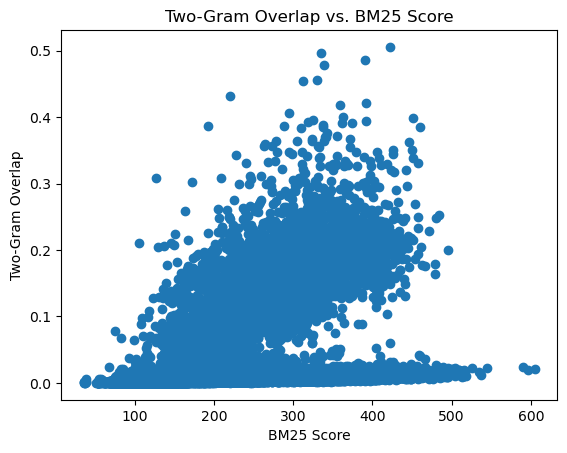

In [8]:
df = l2_get_evaluation_set()
tokenized_corpus = [doc.split(" ") for doc in df[l2_DOCUMENT]]
bm25 = BM25Okapi(tokenized_corpus)

# Simulated BM25 scores and two-gram overlap calculation
bm25_scores = []
two_gram_overlaps = []

for k in range(10, 11): 
    
    pbar = tqdm.tqdm(total=total_rows, desc=f'Retrieval vs. Ngram Score @{k}', unit='row')

    for index, row in df.iterrows():
        query, document = row[l2_QUERY].split(" "), row[l2_DOCUMENT]
        # Simulate BM25 scoring
        doc_scores = bm25.get_scores(query)  # Replace with actual BM25 scoring
        top_k_indexes = heapq.nlargest(k, range(len(doc_scores)), key=lambda i: doc_scores[i])
        
        # Calculate two-gram overlap for top-k documents
        for i in top_k_indexes:
            overlap = two_gram_overlap(row[l2_QUERY], df[l2_DOCUMENT][i])
            bm25_scores.append(doc_scores[i]) 
            two_gram_overlaps.append(overlap)
            
        # Update progress bar
        pbar.update(1)
    
    # Close the progress bar upon completion
    pbar.close()
            
    # Plotting
    plt.scatter(bm25_scores, two_gram_overlaps)
    plt.xlabel('BM25 Score')
    plt.ylabel('Two-Gram Overlap')
    plt.title('Two-Gram Overlap vs. BM25 Score')
    plt.show()